# Guia Practica Modelos Supervisado y No Supervisado con Python y Streamlit


Carmen Elizabeth Neira Inga, N6A.

# Instalar requerimientos importantes

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer



# 1. Carga y exploración

Shape: (46417, 15)

Tipos:
 Periodo                       object
Paralelo                      object
Identificacion_Estudiante     object
Estudiante                    object
Carrera                       object
Nivel                         object
Asignatura                    object
Num_matricula                  int64
Asistencia                   float64
Nota_final                   float64
Estado_Asignatura             object
Estado_Matricula              object
Tipo_Ingreso                  object
Cedula_docente               float64
Nombre_docente                object
dtype: object

Nulos:
 Periodo                         0
Paralelo                     2437
Identificacion_Estudiante       0
Estudiante                      0
Carrera                         0
Nivel                           0
Asignatura                      0
Num_matricula                   0
Asistencia                   1502
Nota_final                      0
Estado_Asignatura               0
Estado_Matricula    

,Periodo,Paralelo,Identificacion_Estudiante,Estudiante,Carrera,Nivel,Asignatura,Num_matricula,Asistencia,Nota_final,Estado_Asignatura,Estado_Matricula,Tipo_Ingreso,Cedula_docente,Nombre_docente
0,2020-2P,L,0107271306,AGUAYZA RODAS KEVIN MATEO,TAF-TECNOLOGIA SUPERIOR EN ASESORIA FINANCIERA,PRIMERO,TAF-116-ATENCIÓN AL CLIENTE,1,82.0,7.4,APROBADO,APROBADO,NORMAL,105003198.0,VERONICA MARIBEL OCHOA CALDERON
1,2020-2P,L,0107271306,AGUAYZA RODAS KEVIN MATEO,TAF-TECNOLOGIA SUPERIOR EN ASESORIA FINANCIERA,PRIMERO,TAF-117-COMUNICACIÓN ORAL Y ESCRITA,1,82.0,7.3,APROBADO,APROBADO,NORMAL,104549159.0,JAIME GEOVANY LOJA BUESTAN
2,2020-2P,L,0107271306,AGUAYZA RODAS KEVIN MATEO,TAF-TECNOLOGIA SUPERIOR EN ASESORIA FINANCIERA,PRIMERO,TAF-114-MANEJO DE CUENTAS,1,100.0,7.8,APROBADO,APROBADO,NORMAL,103280152.0,NORMA ELIZABETH VELECELA ABAMBARI
3,2020-2P,L,0107271306,AGUAYZA RODAS KEVIN MATEO,TAF-TECNOLOGIA SUPERIOR EN ASESORIA FINANCIERA,PRIMERO,TAF-113-MARCO ECONÓMICO,1,100.0,8.1,APROBADO,APROBADO,NORMAL,103970851.0,MONICA ELIZABETH COBOS ROJAS
4,2020-2P,L,0107271306,AGUAYZA RODAS KEVIN MATEO,TAF-TECNOLOGIA SUPERIOR EN ASESORIA FINANCIERA,PRIMERO,TAF-112-MARCO JURÍDICO DEL SECTOR FINANCIERO E...,1,100.0,8.1,APROBADO,APROBADO,NORMAL,103924692.0,MARCO PATRICIO SAMANIEGO DUMAS


,Periodo,Paralelo,Identificacion_Estudiante,Estudiante,Carrera,Nivel,Asignatura,Num_matricula,Asistencia,Nota_final,Estado_Asignatura,Estado_Matricula,Tipo_Ingreso,Cedula_docente,Nombre_docente
count,46417,43980,46417,46417,46417,46417,46417,46417.000000,44915.000000,46417.000000,46417,46417,46417,4.398000e+04,46417
unique,9,18,2334,2334,34,6,851,NaN,NaN,NaN,6,3,3,NaN,158
top,2024-1P,A,0106434665,ANDRADE QUITUIZACA ANDY DANIEL,TDS-TECNOLOGIA SUPERIOR EN DESARROLLO DE SOFTWARE,PRIMERO,TDS-116-FUNDAMENTOS DE PROGRAMACIÓN,NaN,NaN,NaN,APROBADO,APROBADO,NORMAL,NaN,
freq,6567,15628,90,90,9388,14038,456,NaN,NaN,NaN,41682,42076,43865,NaN,2437
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.032510,92.322793,7.903696,NaN,NaN,NaN,2.130524e+08,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186932,19.976083,2.155291,NaN,NaN,NaN,2.700983e+08,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-37.500000,0.000000,NaN,NaN,NaN,1.016854e+08,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,94.440000,7.500000,NaN,NaN,NaN,1.038001e+08,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,100.000000,8.400000,NaN,NaN,NaN,1.045492e+08,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,100.000000,9.150000,NaN,NaN,NaN,1.075995e+08,NaN


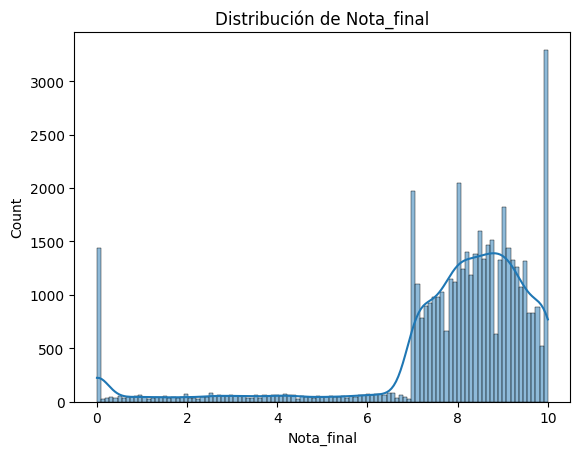

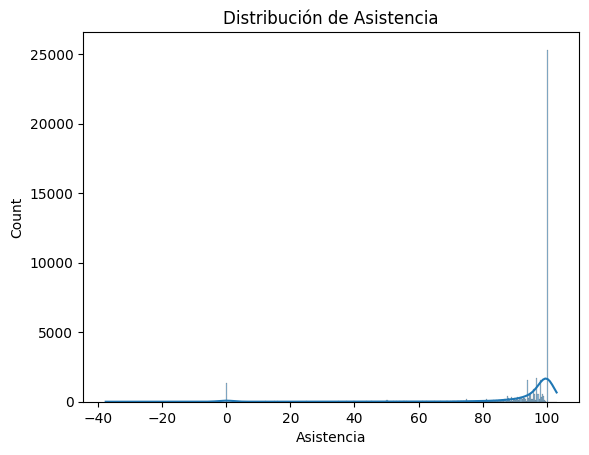

In [9]:
df = pd.read_csv("data/academic_performance_master.csv")

print("Shape:", df.shape)
print("\nTipos:\n", df.dtypes)
print("\nNulos:\n", df.isnull().sum())
print("\nDuplicados:", df.duplicated().sum())
display(df.head())
display(df.describe(include="all"))

# Distribuciones de variables clave (ajusta nombres a tu dataset)
vars_clave = ["Nota_final", "Asistencia"]  # ajusta si tu dataset tiene otros nombres
for v in vars_clave:
    if v in df.columns:
        sns.histplot(df[v], kde=True)
        plt.title(f"Distribución de {v}")
        plt.show()



# 2. Preparación del dataset


In [11]:
# Supongamos que 'Nota_final' determina aprobado: >= 70 aprueba (ajusta umbral)
umbral_aprobado = 70
df["aprobado"] = (df["Nota_final"] >= umbral_aprobado).astype(int)

# Limpieza básica: eliminar filas con nulos en campos clave
campos_clave = ["Nota_final", "Asistencia"]
df = df.dropna(subset=campos_clave)

# Selección de features
# Incluye numéricas y categóricas relevantes; ajusta según columnas presentes
numericas = [c for c in ["Nota_final", "Asistencia", "Parciales", "Tareas"] if c in df.columns]
categoricas = [c for c in ["Nivel", "Carrera"] if c in df.columns]

X = df[numericas + categoricas]
y = df["aprobado"]

# Preprocesamiento: OneHot para categóricas, escalado para numéricas
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numericas),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categoricas)
    ],
    remainder="drop"
)




# 3. Modelo Supervisado: Regresión Logística


In [17]:
umbral = 70  # puedes cambiarlo
df["aprobado"] = (df["Nota_final"] >= umbral).astype(int)

print("\nDistribución de clases:")
print(df["aprobado"].value_counts())

# Validación de clases
if df["aprobado"].nunique() < 2:
    raise ValueError("No es posible entrenar: solo existe una clase. Cambia el umbral o revisa los datos.")

# =========================================================
# 4. SELECCIÓN DE VARIABLES
# =========================================================
numericas = [c for c in ["Nota_final", "Asistencia", "Parciales", "Tareas"] if c in df.columns]
categ = [c for c in ["Nivel", "Carrera"] if c in df.columns]

X = df[numericas + categ]
y = df["aprobado"]

print("\nVariables numéricas usadas:", numericas)
print("Variables categóricas usadas:", categ)

# =========================================================
# 5. DIVISIÓN TRAIN / TEST
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("\nTamaños:")
print("Train:", X_train.shape)
print("Test:", X_test.shape)

# =========================================================
# 6. PREPROCESAMIENTO + MODELO
# =========================================================
preprocess = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]), numericas),

    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), categ)
])

clf = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=1000, C=1.0, solver="lbfgs"))
])

# =========================================================
# 7. ENTRENAR EL MODELO
# =========================================================
clf.fit(X_train, y_train)
print("\nModelo entrenado correctamente ✔️")

# =========================================================
# 8. EVALUACIÓN DEL MODELO
# =========================================================
y_pred = clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# =========================================================
# 9. IMPORTANCIA DE VARIABLES
# =========================================================
# Obtener nombres de categorías codificadas
ohe = clf.named_steps["prep"].named_transformers_["cat"]
cat_names = list(ohe.get_feature_names_out(categ)) if len(categ) > 0 else []

# Nombres finales
feature_names = numericas + cat_names

# Coeficientes
coef = clf.named_steps["model"].coef_[0]

# Importancia ordenada
importancia = pd.Series(coef, index=feature_names).sort_values(key=lambda x: x.abs(), ascending=False)

print("\nImportancia de variables:")
display(importancia)


Distribución de clases:
aprobado
0    44915
Name: count, dtype: int64


ValueError: No es posible entrenar: solo existe una clase. Cambia el umbral o revisa los datos.

# 4. Clustering K-Means (2 a 4 clusters)


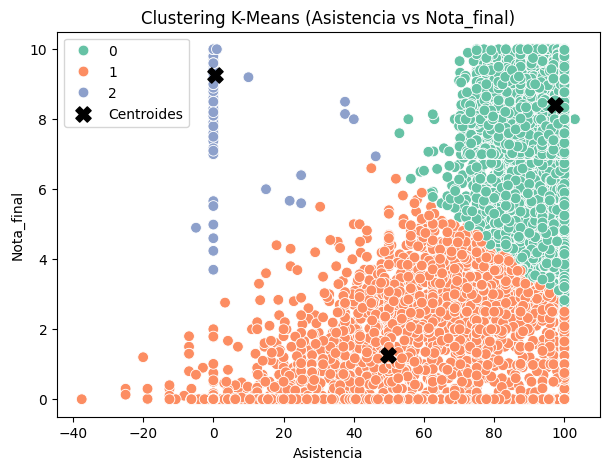

In [11]:
# Usaremos solo numéricas clave para clustering
cluster_features = [c for c in ["Asistencia", "Nota_final"] if c in df.columns]
df_cluster = df[cluster_features].dropna()

scaler = StandardScaler()
Z = scaler.fit_transform(df_cluster)

k = 3  # ajustable entre 2 y 4
km = KMeans(n_clusters=k, random_state=42)
labels = km.fit_predict(Z)
centroids = scaler.inverse_transform(km.cluster_centers_)

df_cluster_plot = df_cluster.copy()
df_cluster_plot["cluster"] = labels

# Gráfico de dispersión
plt.figure(figsize=(7,5))
palette = sns.color_palette("Set2", k)
sns.scatterplot(
    data=df_cluster_plot,
    x="Asistencia", y="Nota_final", hue="cluster", palette=palette, s=60
)
plt.scatter(centroids[:,0], centroids[:,1], c="black", s=120, marker="X", label="Centroides")
plt.legend()
plt.title("Clustering K-Means (Asistencia vs Nota_final)")
plt.show()


# 5. Interpretación

In [ ]:
# - Supervisado: Accuracy alto indica buena predicción; revisa desbalance y ROC si procede.
# - Variables influyentes: coeficientes con mayor magnitud (positivos/negativos).
# - No supervisado: clusters con patrones (alta asistencia–alta nota, baja asistencia–baja nota, etc.).